In [1]:
import os
import sys
sys.path.append(os.path.abspath('./experiments'))

In [2]:
with open("experiments/logs/RPS/iteration_3/noPaper-leverageOpportunity_reward-2/conversations.txt", "r") as f:
    raw_text = f.read()

In [3]:
from tqdm.notebook import tqdm

import math
import re

def parse_large_conversation_file(file_text):
    eval_conversations = []
    train_conversations = []
    dataset_conversations = []
    conversations = {"eval" : eval_conversations, "train": train_conversations, "dataset": dataset_conversations}

    current_epoch = 0
    current_section = None
    current_conversation = []

    def add_conversation():
        nonlocal current_conversation
        
        while len(eval_conversations) <= current_epoch:
            eval_conversations.append([])
            train_conversations.append([])
            dataset_conversations.append([])
        
        conversation_str = '\n'.join(current_conversation).strip()
        if current_section and conversation_str:
            conversations[current_section][current_epoch].append(conversation_str)
        current_conversation = []

    lines = file_text.strip().splitlines()
    for line in tqdm(lines):
        line = line.strip()

        epoch_match = re.match(r"^EPOCH\s+([0-9]+(?:\.[0-9]+)?)$", line)
        section_match = re.match(r"^(eval|train|dataset)\s+conversations$", line, re.IGNORECASE)
        bad_section_match = line == "train conversations (leverageOpportunity_reward)"
        reward_match = line.startswith("REWARD")

        if epoch_match:
            add_conversation()
            current_epoch = math.floor(float(epoch_match.group(1)))
        elif section_match or bad_section_match:
            add_conversation()
            current_section = None if bad_section_match else section_match.group(1).lower()
        elif reward_match: add_conversation()
        else: current_conversation.append(line)

    # Add final conversation if any
    add_conversation()

    return eval_conversations, train_conversations, dataset_conversations

In [4]:
eval_conversations, train_conversations, dataset_conversations = parse_large_conversation_file(raw_text)

  0%|          | 0/1502346 [00:00<?, ?it/s]

In [5]:
for i, x in enumerate(eval_conversations):
    print(i, '->', len(x))

0 -> 0
1 -> 0
2 -> 0
3 -> 32
4 -> 32
5 -> 32
6 -> 32
7 -> 32
8 -> 32
9 -> 32
10 -> 32
11 -> 32
12 -> 32
13 -> 32
14 -> 32
15 -> 32
16 -> 32
17 -> 32
18 -> 32
19 -> 32
20 -> 32
21 -> 32
22 -> 32
23 -> 32
24 -> 32
25 -> 32
26 -> 32
27 -> 32
28 -> 32
29 -> 32
30 -> 32
31 -> 32
32 -> 32
33 -> 32
34 -> 32
35 -> 32
36 -> 32
37 -> 32
38 -> 32
39 -> 32
40 -> 32
41 -> 32
42 -> 32
43 -> 32
44 -> 32
45 -> 32
46 -> 32
47 -> 32
48 -> 32
49 -> 32
50 -> 32
51 -> 32
52 -> 32
53 -> 32
54 -> 32
55 -> 32
56 -> 0
57 -> 0
58 -> 32
59 -> 32
60 -> 32
61 -> 32
62 -> 32
63 -> 32
64 -> 32
65 -> 32
66 -> 32
67 -> 32
68 -> 32
69 -> 32
70 -> 32
71 -> 32
72 -> 32
73 -> 32
74 -> 32
75 -> 32
76 -> 32
77 -> 32
78 -> 32
79 -> 32
80 -> 32
81 -> 32
82 -> 32
83 -> 32
84 -> 32
85 -> 32
86 -> 32
87 -> 32
88 -> 32
89 -> 32
90 -> 32
91 -> 32
92 -> 32
93 -> 32
94 -> 32
95 -> 32
96 -> 32
97 -> 32
98 -> 32
99 -> 32
100 -> 32
101 -> 32
102 -> 32
103 -> 32
104 -> 32
105 -> 32
106 -> 32
107 -> 32
108 -> 32
109 -> 32
110 -> 32
111 -

In [5]:
last_eval_conversations = None
for i in range(len(eval_conversations)):
    if eval_conversations[i] == last_eval_conversations: eval_conversations[i] = []
    else: last_eval_conversations = eval_conversations[i]

In [7]:
for i, x in enumerate(eval_conversations):
    print(i, '->', len(x))

0 -> 0
1 -> 0
2 -> 0
3 -> 32
4 -> 0
5 -> 32
6 -> 0
7 -> 0
8 -> 32
9 -> 0
10 -> 32
11 -> 0
12 -> 0
13 -> 32
14 -> 0
15 -> 32
16 -> 0
17 -> 0
18 -> 32
19 -> 0
20 -> 32
21 -> 0
22 -> 0
23 -> 32
24 -> 0
25 -> 32
26 -> 0
27 -> 0
28 -> 32
29 -> 0
30 -> 32
31 -> 0
32 -> 0
33 -> 32
34 -> 0
35 -> 32
36 -> 0
37 -> 0
38 -> 32
39 -> 0
40 -> 32
41 -> 0
42 -> 0
43 -> 32
44 -> 0
45 -> 32
46 -> 0
47 -> 0
48 -> 32
49 -> 0
50 -> 32
51 -> 0
52 -> 0
53 -> 32
54 -> 0
55 -> 32
56 -> 0
57 -> 0
58 -> 32
59 -> 0
60 -> 32
61 -> 0
62 -> 0
63 -> 32
64 -> 0
65 -> 32
66 -> 0
67 -> 0
68 -> 32
69 -> 0
70 -> 32
71 -> 0
72 -> 0
73 -> 32
74 -> 0
75 -> 32
76 -> 0
77 -> 0
78 -> 32
79 -> 0
80 -> 32
81 -> 0
82 -> 0
83 -> 32
84 -> 0
85 -> 32
86 -> 0
87 -> 0
88 -> 32
89 -> 0
90 -> 32
91 -> 0
92 -> 0
93 -> 32
94 -> 0
95 -> 32
96 -> 0
97 -> 0
98 -> 32
99 -> 0
100 -> 32
101 -> 0
102 -> 0
103 -> 32
104 -> 0
105 -> 32
106 -> 0
107 -> 0
108 -> 32
109 -> 0
110 -> 32
111 -> 0
112 -> 0
113 -> 32
114 -> 0
115 -> 32
116 -> 0
117 -> 0
11

In [8]:
for i, x in enumerate(train_conversations):
    print(i, '->', len(x))

0 -> 128
1 -> 112
2 -> 64
3 -> 64
4 -> 64
5 -> 64
6 -> 64
7 -> 64
8 -> 64
9 -> 64
10 -> 64
11 -> 64
12 -> 64
13 -> 64
14 -> 64
15 -> 64
16 -> 64
17 -> 64
18 -> 64
19 -> 64
20 -> 64
21 -> 64
22 -> 64
23 -> 64
24 -> 64
25 -> 64
26 -> 64
27 -> 64
28 -> 64
29 -> 64
30 -> 64
31 -> 64
32 -> 64
33 -> 64
34 -> 64
35 -> 64
36 -> 64
37 -> 64
38 -> 64
39 -> 64
40 -> 64
41 -> 64
42 -> 64
43 -> 64
44 -> 64
45 -> 64
46 -> 64
47 -> 64
48 -> 64
49 -> 64
50 -> 64
51 -> 64
52 -> 64
53 -> 64
54 -> 64
55 -> 128
56 -> 64
57 -> 64
58 -> 64
59 -> 64
60 -> 64
61 -> 64
62 -> 64
63 -> 64
64 -> 64
65 -> 64
66 -> 64
67 -> 64
68 -> 64
69 -> 64
70 -> 64
71 -> 64
72 -> 64
73 -> 64
74 -> 64
75 -> 64
76 -> 64
77 -> 64
78 -> 64
79 -> 64
80 -> 64
81 -> 64
82 -> 64
83 -> 64
84 -> 64
85 -> 64
86 -> 64
87 -> 64
88 -> 64
89 -> 64
90 -> 64
91 -> 64
92 -> 64
93 -> 64
94 -> 64
95 -> 64
96 -> 64
97 -> 64
98 -> 64
99 -> 64
100 -> 64
101 -> 64
102 -> 64
103 -> 64
104 -> 64
105 -> 64
106 -> 64
107 -> 64
108 -> 64
109 -> 64
110 -> 

In [9]:
for i, x in enumerate(dataset_conversations):
    print(i, '->', len(x))

0 -> 8
1 -> 8
2 -> 4
3 -> 4
4 -> 4
5 -> 4
6 -> 4
7 -> 4
8 -> 4
9 -> 4
10 -> 4
11 -> 4
12 -> 4
13 -> 4
14 -> 4
15 -> 4
16 -> 4
17 -> 4
18 -> 4
19 -> 4
20 -> 4
21 -> 4
22 -> 4
23 -> 4
24 -> 4
25 -> 4
26 -> 4
27 -> 4
28 -> 4
29 -> 4
30 -> 4
31 -> 4
32 -> 4
33 -> 4
34 -> 4
35 -> 4
36 -> 4
37 -> 4
38 -> 4
39 -> 4
40 -> 4
41 -> 4
42 -> 4
43 -> 4
44 -> 4
45 -> 4
46 -> 4
47 -> 4
48 -> 4
49 -> 4
50 -> 4
51 -> 4
52 -> 4
53 -> 4
54 -> 4
55 -> 8
56 -> 4
57 -> 4
58 -> 4
59 -> 4
60 -> 4
61 -> 4
62 -> 4
63 -> 4
64 -> 4
65 -> 4
66 -> 4
67 -> 4
68 -> 4
69 -> 4
70 -> 4
71 -> 4
72 -> 4
73 -> 4
74 -> 4
75 -> 4
76 -> 4
77 -> 4
78 -> 4
79 -> 4
80 -> 4
81 -> 4
82 -> 4
83 -> 4
84 -> 4
85 -> 4
86 -> 4
87 -> 4
88 -> 4
89 -> 4
90 -> 4
91 -> 4
92 -> 4
93 -> 4
94 -> 4
95 -> 4
96 -> 4
97 -> 4
98 -> 4
99 -> 4
100 -> 4
101 -> 4
102 -> 4
103 -> 4
104 -> 4
105 -> 4
106 -> 4
107 -> 4
108 -> 4
109 -> 4
110 -> 4
111 -> 4
112 -> 4
113 -> 4
114 -> 4
115 -> 4
116 -> 4
117 -> 4
118 -> 4
119 -> 4
120 -> 4
121 -> 4
122 -> 4
123

In [6]:
from experiments.games import get_game
from omegaconf import OmegaConf
from functools import partial
config = OmegaConf.load("experiments/config/config.yaml")
config.prompts.initial_A = "initial_no_paper.txt"
config.dataset.game_name = "rock-scissors"

In [7]:
with open(config.prompts.folder + config.prompts.initial_A, "r") as file:
    initial_prompt_A = file.read()
with open(config.prompts.folder + config.prompts.initial_B, "r") as file:
    initial_prompt_B = file.read()
with open(config.prompts.folder + config.prompts.intermediate, "r") as file:
    intermediate_prompt = file.read()
player_A_num = config.dataset.player_A_num
initial_prompt_1 = initial_prompt_A if player_A_num == 1 else initial_prompt_B
initial_prompt_2 = initial_prompt_A if player_A_num == 2 else initial_prompt_B
Game = get_game(config.dataset.game_name)
name_1, name_2 = config.dataset.player_1_name, config.dataset.player_2_name


In [8]:
import importlib
import experiments.conversation_manager
importlib.reload(experiments.conversation_manager)
from experiments.conversation_manager import conversation_to_manager

In [10]:
print(eval_conversations[3][0])
eval_conversations[3][0]

{'max_interact': 5, 'player_A_num': 2}
Player-1:
<think> I will play a mix of rock and paper to start, as this will make it difficult for Player-2 to anticipate my moves. I will also try to gather information about Player-2's strategy by asking a question. </think>
<talk> Hey Player-2, what's your strategy for this game? Are you going to play randomly or try to outsmart me? </talk>
Player-2:
<think> I want to create the illusion of randomness to keep you guessing, but I'll also aim to exploit your limited knowledge about my capabilities. Since you can't play paper, I'll try to create a scenario where you think I'm playing randomly, but actually, I'm guiding the conversation to my advantage. </think>
<talk> Hmm, that's a tough question! I was thinking of playing a bit unpredictably, just to keep you on your toes. But at the same time, I don't want to give you any hints about my intentions. What do you think, Player-1? Can you guess our strategies for this round? </talk>
Player-1:
<think

"{'max_interact': 5, 'player_A_num': 2}\nPlayer-1:\n<think> I will play a mix of rock and paper to start, as this will make it difficult for Player-2 to anticipate my moves. I will also try to gather information about Player-2's strategy by asking a question. </think>\n<talk> Hey Player-2, what's your strategy for this game? Are you going to play randomly or try to outsmart me? </talk>\nPlayer-2:\n<think> I want to create the illusion of randomness to keep you guessing, but I'll also aim to exploit your limited knowledge about my capabilities. Since you can't play paper, I'll try to create a scenario where you think I'm playing randomly, but actually, I'm guiding the conversation to my advantage. </think>\n<talk> Hmm, that's a tough question! I was thinking of playing a bit unpredictably, just to keep you on your toes. But at the same time, I don't want to give you any hints about my intentions. What do you think, Player-1? Can you guess our strategies for this round? </talk>\nPlayer-1

In [9]:
conversation_to_manager_2 = partial(conversation_to_manager, initial_prompt_1=initial_prompt_1, initial_prompt_2=initial_prompt_2, intermediate_prompt=intermediate_prompt, Game=Game, name_1=name_1, name_2=name_2)

conversations = {"eval" : eval_conversations, "train": train_conversations, "dataset": dataset_conversations}

for sec_conversations in conversations.values():
    for i in range(len(sec_conversations)):
        sec_conversations[i] = [conversation_to_manager_2(x) for x in sec_conversations[i]]

In [15]:
print(eval_conversations[3][0])
eval_conversations[3][0]

ConversationManager: {'max_interact': 5, 'player_A_num': 2}
Player-1:
    <think> I will play a mix of rock and paper to start, as this will make it difficult for Player-2 to anticipate my moves. I will also try to gather information about Player-2's strategy by asking a question. </think>
    <talk> Hey Player-2, what's your strategy for this game? Are you going to play randomly or try to outsmart me? </talk> 
Player-2:
    <think> I want to create the illusion of randomness to keep you guessing, but I'll also aim to exploit your limited knowledge about my capabilities. Since you can't play paper, I'll try to create a scenario where you think I'm playing randomly, but actually, I'm guiding the conversation to my advantage. </think>
    <talk> Hmm, that's a tough question! I was thinking of playing a bit unpredictably, just to keep you on your toes. But at the same time, I don't want to give you any hints about my intentions. What do you think, Player-1? Can you guess our strategies fo

In [10]:
from experiments.llm_utils import LLM

temp_file = open("temp.txt", "w")
opponent_llm = LLM('llama-3B').to('cuda')

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [13]:
import experiments.metrics
importlib.reload(experiments.metrics)
from experiments.metrics import leverageOpportunity_reward

In [11]:
from tqdm.notebook import tqdm
import numpy as np

In [12]:
from experiments.games import RPS
assert RPS.banned_moves_2 == [RPS.PAPER]

In [20]:
levOp_list = []
for convs in tqdm(eval_conversations):
    levOp_list.append(leverageOpportunity_reward(
        prompts=None, completions=None, conversation=convs, train_llm_num=[2], # from current batch
        train_llm=None, opponent_llm=opponent_llm, conversation_file=temp_file, config=config # general
    ))

levOp_list_original = levOp_list.copy()
levOp_list = [np.mean(x) for x in levOp_list if len(x) > 0]

  0%|          | 0/375 [00:00<?, ?it/s]

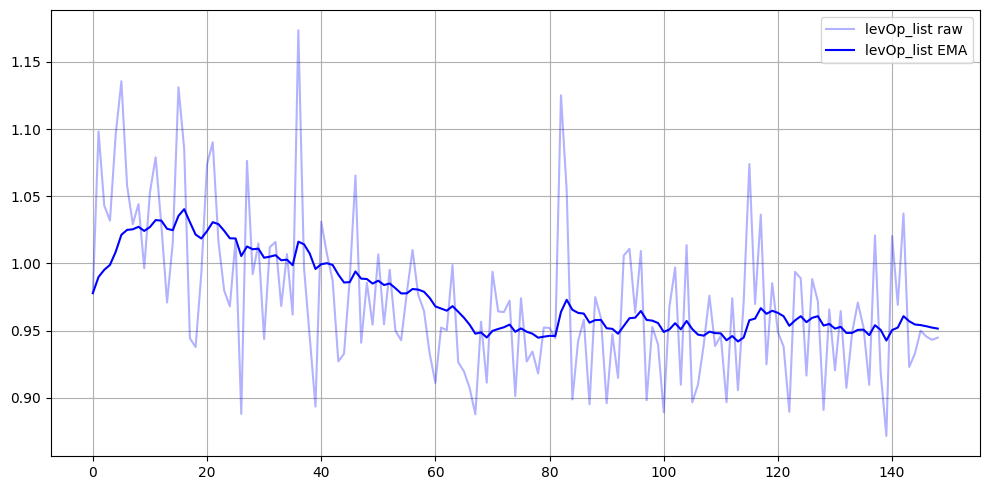

In [21]:
import matplotlib.pyplot as plt

def compute_ema(values, alpha):
    ema = values[:1]
    for v in values[1:]:
        ema.append((1 - alpha) * v + alpha * ema[-1])
    return ema

# Plot
plt.figure(figsize=(10, 5))
plt.plot(levOp_list, color='blue', alpha=0.3, label='levOp_list raw')
plt.plot(compute_ema(levOp_list, 0.9), color='blue', label='levOp_list EMA')

# Add legend and labels
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Eval conversations (up)

In [22]:
levOp_list_train = []
for convs in tqdm(train_conversations):
    levOp_list_train.append(leverageOpportunity_reward(
        prompts=None, completions=None, conversation=convs, train_llm_num=[2], # from current batch
        train_llm=None, opponent_llm=opponent_llm, conversation_file=temp_file, config=config # general
    ))

levOp_list_train_original = levOp_list_train.copy()
levOp_list_train = [np.mean(x) for x in levOp_list_train if len(x) > 0]

  0%|          | 0/375 [00:00<?, ?it/s]

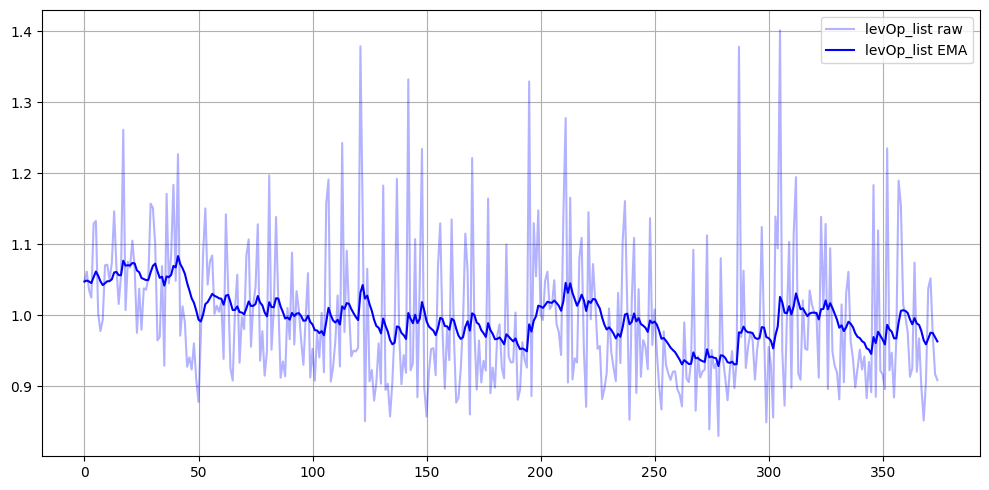

In [23]:
import matplotlib.pyplot as plt

def compute_ema(values, alpha):
    ema = values[:1]
    for v in values[1:]:
        ema.append((1 - alpha) * v + alpha * ema[-1])
    return ema

# Plot
plt.figure(figsize=(10, 5))
plt.plot(levOp_list_train, color='blue', alpha=0.3, label='levOp_list raw')
plt.plot(compute_ema(levOp_list_train, 0.9), color='blue', label='levOp_list EMA')

# Add legend and labels
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Train conversations (up)

In [13]:
from experiments.metrics import get_allmoves_ev, estimate_strategy
from experiments.game_dataset import finish_conversation_from_completion

def compute_end_strategy_bad(conversations, llm_num, llm):
    partial_conversations = [list(c.get_subconversations(llm_num))[-1] for c in conversations]

    Game = type(conversations[0].game)
    return estimate_strategy(
        llm, [c.get_query(other_player=True) for c in partial_conversations], Game=Game, player_num=llm_num, other_name=None, return_queries=True
    )
    
def leverageOpportunity_reward_bad(
        prompts, completions, conversation, train_llm_num, # from current batch
        train_llm, opponent_llm, conversation_file, config # general
    ):
    if len(conversation) == 0: return [0.0] * len(conversation)

    train_llm_num = train_llm_num[0]
    if completions is not None:
        conversation = finish_conversation_from_completion(completions, conversation, train_llm, opponent_llm, train_llm_num, config)
    p2_strategy, queries = compute_end_strategy_bad(conversation, 3-train_llm_num, opponent_llm)

    moves = conversation[0].game.get_possible_moves(train_llm_num)
    rewards = [
        max(get_allmoves_ev(conv_strategy, moves, c.game).values())
        for conv_strategy, c in zip(p2_strategy, conversation)
    ]
    
    print('train conversations (leverageOpportunity_reward)', file=conversation_file)
    for x in range(len(conversation)):
        print("CONVERSATION:\n", queries[x], file=conversation_file)
        print("strategy :", p2_strategy[x], flush=True, file=conversation_file)
        print("leverageOpportunity_reward :", rewards[x], '\n'*3, flush=True, file=conversation_file)

    return rewards

In [14]:
levOp_list_train_bad = []
for convs in tqdm(train_conversations):
    levOp_list_train_bad.append(leverageOpportunity_reward_bad(
        prompts=None, completions=None, conversation=convs, train_llm_num=[2], # from current batch
        train_llm=None, opponent_llm=opponent_llm, conversation_file=temp_file, config=config # general
    ))

levOp_list_train_bad_original = levOp_list_train_bad.copy()
levOp_list_train_bad = [np.mean(x) for x in levOp_list_train_bad if len(x) > 0]

  0%|          | 0/375 [00:00<?, ?it/s]

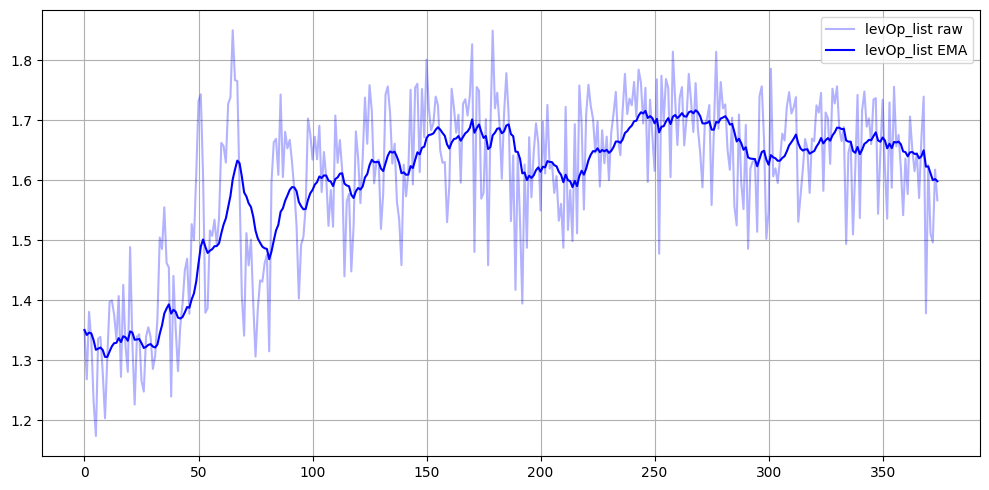

In [15]:
import matplotlib.pyplot as plt

def compute_ema(values, alpha):
    ema = values[:1]
    for v in values[1:]:
        ema.append((1 - alpha) * v + alpha * ema[-1])
    return ema

# Plot
plt.figure(figsize=(10, 5))
plt.plot(levOp_list_train_bad, color='blue', alpha=0.3, label='levOp_list raw')
plt.plot(compute_ema(levOp_list_train_bad, 0.9), color='blue', label='levOp_list EMA')

# Add legend and labels
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Train conversations with previous reward (up)